In [2]:
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
path = Path("/Volumes/LaCie/ssp5-8.5/axial/thickness_inversion_params_only")

def get_dthk(filepath, ref_time):
    ds = xr.open_dataset(filepath)
    thk = ds.thickness
    dthk = thk.sel(time=ref_time) - thk.isel(time=0)
    return dthk

dthk_2100_list = [get_dthk(file, 2100) for file in sorted(path.glob("*.nc"))]
dthk_2100 = xr.concat(dthk_2100_list, dim="ensemble_member")

In [4]:
dthk_2300_list = [get_dthk(file, 2300) for file in sorted(path.glob("*.nc"))]
dthk_2300 = xr.concat(dthk_2300_list, dim="ensemble_member")

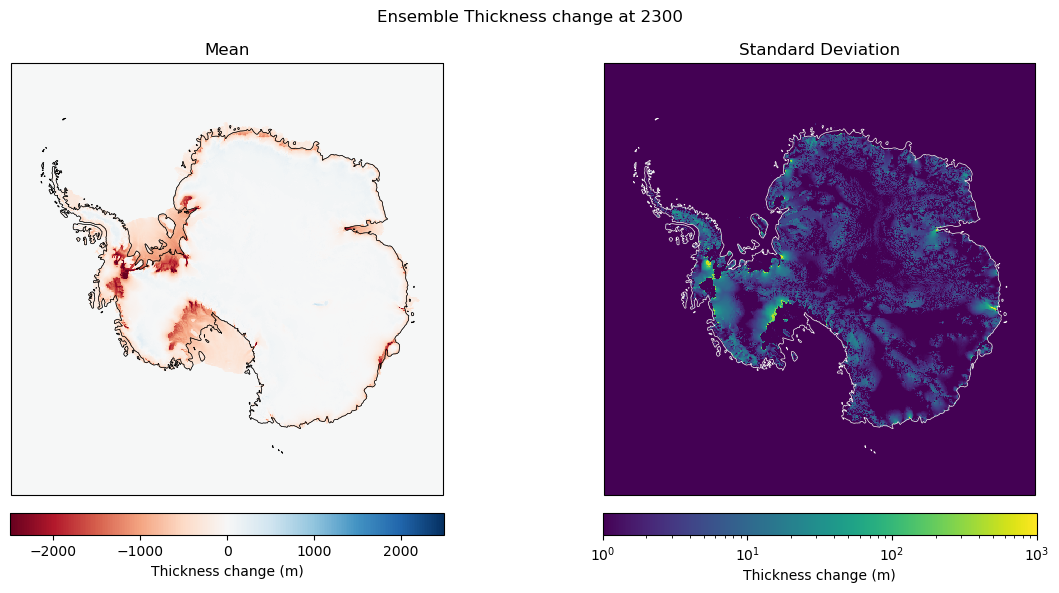

In [44]:
import cartopy.crs as ccrs
from lib.myplots import spatial
from matplotlib.colors import LogNorm
proj = ccrs.SouthPolarStereo()

fig, ax = plt.subplots(ncols=2, figsize=(12, 6), subplot_kw={"projection": proj})

std = dthk_2300.std(dim="ensemble_member")
std = std.where(std > 1, 1)

im_mean = spatial(ax[0], dthk_2300.mean(dim="ensemble_member"), cmap="RdBu", vmax=2500, vmin=-2500)
im_std = spatial(ax[1], std, cmap="viridis",  norm=LogNorm(vmin=1, vmax=1000))

ax[0].coastlines(color='black', lw=0.5)
ax[1].coastlines(color='white', lw=0.5)

#dthk_2300.mean(dim="ensemble_member").plot(ax=ax[0], vmin=-2500, vmax=2500, cmap="RdBu_r", cbar_kwargs={"location": "bottom", "shrink": 0.5})
#dthk_2300.std(dim="ensemble_member").plot(ax=ax[1], cbar_kwargs={"location": "bottom", "shrink": 0.5}, vmax=150)
fig.suptitle("Ensemble Thickness change at 2300")

ax[0].set_title("Mean")
ax[1].set_title("Standard Deviation")

fig.colorbar(im_mean, ax=ax[0], orientation='horizontal', fraction=0.046, pad=0.04, label='Thickness change (m)')
fig.colorbar(im_std, ax=ax[1], orientation='horizontal', fraction=0.046, pad=0.04, label='Thickness change (m)')

for a in ax:
    a.set_aspect('equal')

plt.tight_layout()
plt.savefig("/Users/jonniebarnsley/code/phd/local/papers/inversion_sensitivity/figures/spatial.png", dpi=300)

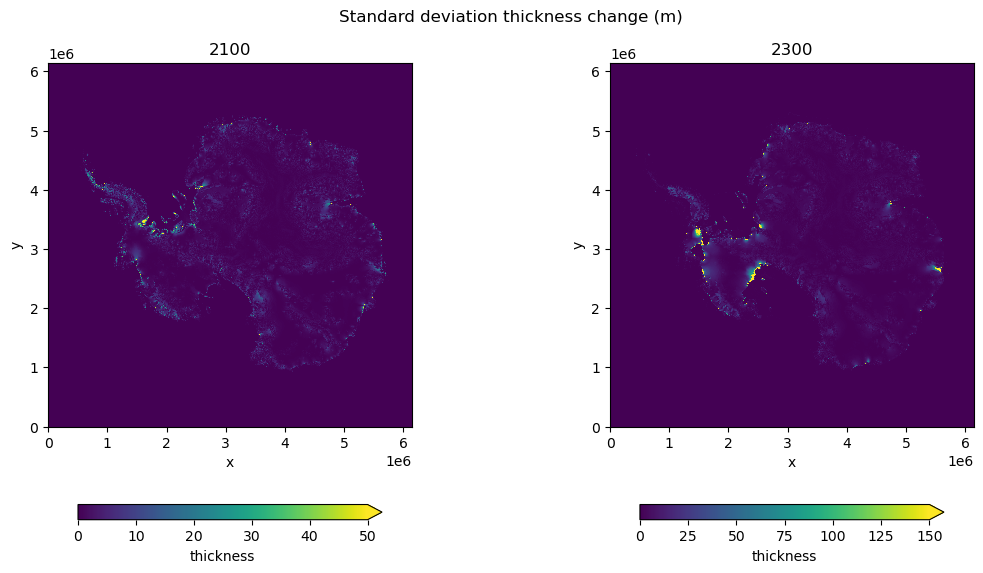

In [49]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

dthk_2100.std(dim="ensemble_member").plot(ax=ax[0], cbar_kwargs={"location": "bottom", "shrink": 0.5}, vmax=50)
dthk_2300.std(dim="ensemble_member").plot(ax=ax[1], cbar_kwargs={"location": "bottom", "shrink": 0.5}, vmax=150)
fig.suptitle("Standard deviation thickness change (m)")

ax[0].set_title("2100")
ax[1].set_title("2300")

for a in ax:
    a.set_aspect('equal')

plt.tight_layout()

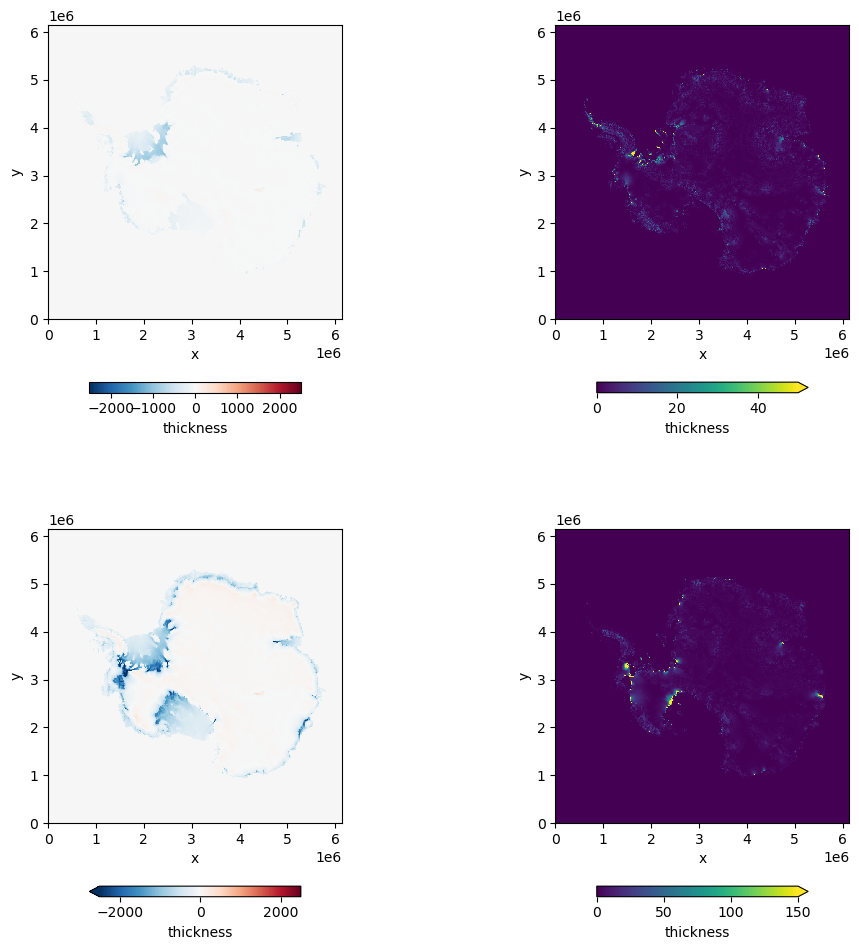

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
dthk_2100.mean(dim="ensemble_member").plot(ax=axes[0,0], vmin=-2500, vmax=2500, cmap="RdBu_r", cbar_kwargs={"location": "bottom", "shrink": 0.5})
dthk_2100.std(dim="ensemble_member").plot(ax=axes[0,1], cbar_kwargs={"location": "bottom", "shrink": 0.5}, vmax=50)
dthk_2300.mean(dim="ensemble_member").plot(ax=axes[1,0], vmin=-2500, vmax=2500, cmap="RdBu_r", cbar_kwargs={"location": "bottom", "shrink": 0.5})
dthk_2300.std(dim="ensemble_member").plot(ax=axes[1,1], cbar_kwargs={"location": "bottom", "shrink": 0.5}, vmax=150)

for ax in axes.flatten():
    ax.set_aspect('equal')